# 📓 Chapter 4 Notebook  
## Fluids: Pressure, Buoyancy, and Surface Effects  
### *Why fluids behave differently than solids*


This notebook is beginner-friendly. “Optional: Advanced” cells are **pre-filled** and can be run without understanding every line.


---
## 🧠 Learning Goals

By the end of this notebook, you will be able to:

- Compute **pressure vs. depth** in a fluid
- Use **Archimedes’ principle** to predict buoyancy (float / sink)
- Explain **surface tension** and why small-scale fluids behave differently
- Predict **capillary rise** and explore how tube radius matters
- Connect these ideas to **biology** (lungs, insects on water, capillaries)


---
## ✅ Setup (run once)

If you get an error like `ModuleNotFoundError`, run the install cell once and restart the kernel.


In [1]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

---
## 🌊 Part 1 — Pressure in Fluids (Hydrostatics)

A fluid at rest has pressure that increases with depth:

$$P(h)=P_0 + \rho g h $$

Where:
- $P_0$ is surface pressure (Pa)  
- $\rho$ is fluid density (kg/m³)  
- $g$ is gravity (m/s²)  
- $h$ is depth below surface (m)


In [2]:
# Parameters
rho = 1000      # kg/m^3 (water)
g = 9.81        # m/s^2
P0 = 101325     # Pa (atmospheric pressure)
h = 2.0         # m depth

P = P0 + rho*g*h
P

120945.0

### Try this
Change `h` (depth). How quickly does pressure increase?


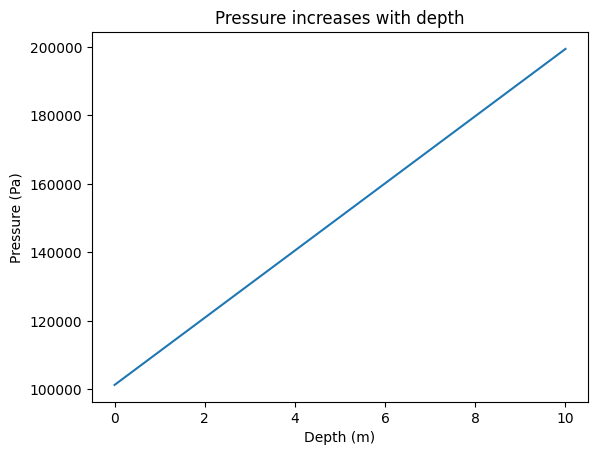

In [5]:
# Plot pressure vs depth
depth = [0, 0.5, 1, 2, 5, 10]
pressure = [P0 + rho*g*d for d in depth]

plt.plot(depth, pressure)
plt.xlabel("Depth (m)")
plt.ylabel("Pressure (Pa)")
plt.title("Pressure increases with depth")
plt.show()

#### ⭐ Optional: Advanced (pre-filled)
The following demonstrates how you could generate a plot with many more samples within a range, without explicitly writing out each x-axis entry.


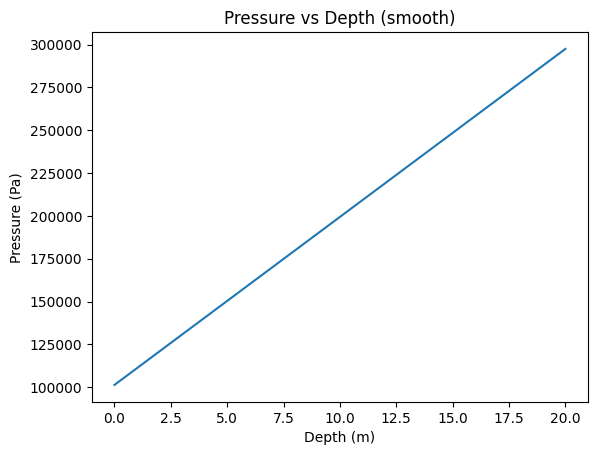

In [ ]:
# Optional advanced plot
depth = [i*0.1 for i in range(0, 201)]  # define depth as range from 0 to 20 m in 0.1 increments
pressure = [P0 + rho*g*d for d in depth]

plt.plot(depth, pressure)
plt.xlabel("Depth (m)")
plt.ylabel("Pressure (Pa)")
plt.title("Pressure vs Depth (smooth)")
plt.show()

---
## 🛟 Part 2 — Buoyancy (Archimedes’ Principle)

An object in a fluid experiences an upward **buoyant force** equal to the weight of displaced fluid:

$$
F_b=\rho_{\text{fluid}}* g *V_{\text{displaced}}
$$

The object’s weight is:
$$
W=\rho_{\text{object}} *g* V_{\text{object}}
$$

### Float or sink?
- If $F_b > W$ → floats  
- If $F_b < W$ → sinks  


In [7]:
# Example object
rho_fluid = 1000     # kg/m^3 (water)
rho_object = 900     # kg/m^3 (like some plastics / wood)
V_object = 1e-3      # m^3 (1 liter)

Fb = rho_fluid * g * V_object
W  = rho_object * g * V_object

Fb, W

(9.81, 8.829)

The logical statement below will return True or False, depending on if it meets the condition for floating.

In [8]:
floats = Fb > W
floats

True

### Try this
Change `rho_object`. Find the threshold where it just barely floats.


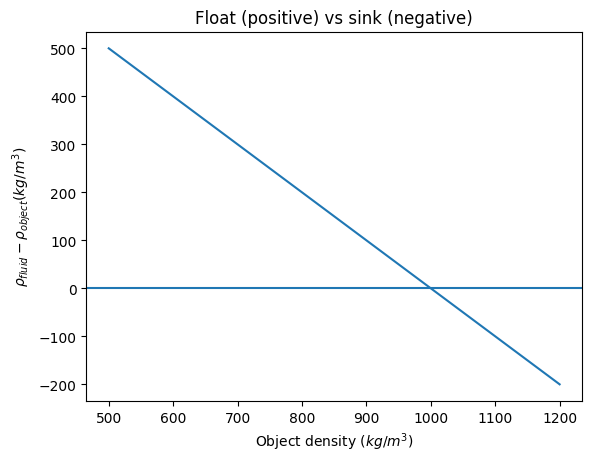

In [16]:
# Explore buoyancy by sweeping object density
rho_objects = [500, 800, 950, 1000, 1050, 1200]
buoyancy_margin = [rho_fluid - r for r in rho_objects]  # positive means tends to float

plt.plot(rho_objects, buoyancy_margin)
plt.axhline(0)
plt.xlabel("Object density $(kg/m^3)$")
plt.ylabel("$ρ_{fluid} - ρ_{object} (kg/m^3)$")
plt.title("Float (positive) vs sink (negative)")
plt.show()

Since this is also a linear relationship, we don't need to add more plotted values. But we could using the code from a few blocks up:

In [ ]:
rho_objects = [i*0.5 for i in range(500, 1200)] # define range from 500 to 1200 in steps of 0.5

---
## 🫧 Part 3 — Surface Tension

At small scales, a liquid surface behaves like a **stretched membrane**.

A simple way to see its importance is with the **capillary length** scale:

- Surface effects dominate for small sizes
- Gravity dominates for large sizes

You don’t need the full derivation here—just remember:

> Surface tension is why water beads up, why insects can stand on water, and why lung surfactant matters.


## 🧪 Part 4 — Capillary Rise

Capillary action is fluid rise in a narrow tube, roughly:

$$
h = \frac{2T \cos\theta}{\rho g r}
$$

Where:
- $h$ is rise height (m)
- $T$ is surface tension (N/m)
- $\theta$ is contact angle
- $r$ is tube radius (m)

### Key idea
Smaller radius → larger capillary rise.


In [18]:
import math

In [37]:
# Capillary parameters (approx)
T = 0.072      # N/m (water at room temperature)
theta_deg = 60      # degrees (wetting)
theta = math.radians(theta_deg)
rho = 1000
g = 9.81

r = 0.5e-3  # 0.5 mm tube radius
h = (2*T*math.cos(theta)) / (rho*g*r) *1000 # *1000 to see result in mm to assess on length scale we expect to see changes
h

14.678899082568808

### Try this
Change `r` (radius). Notice the **1/r** relationship.


In [41]:
import numpy as np

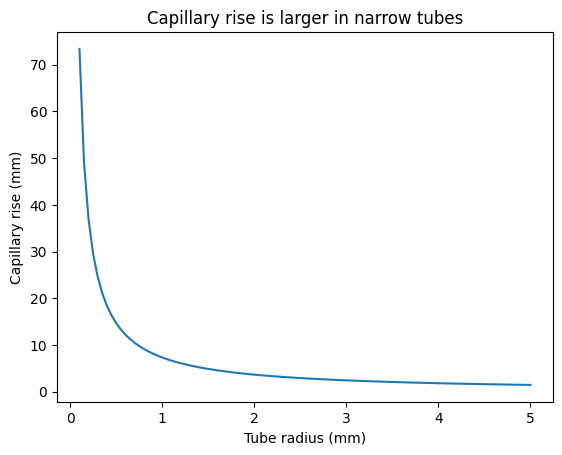

In [42]:
# Plot capillary rise vs radius
radii = np.linspace(0.1e-3, 5e-3, 100) # a more convenient way to make a vector spanning a max an min with 100 points evenly spaced
heights = [(2*T*math.cos(theta))/(rho*g*r) for r in radii]

plt.plot([r*1e3 for r in radii], [h*1000 for h in heights])
plt.xlabel("Tube radius (mm)")
plt.ylabel("Capillary rise (mm)")
plt.title("Capillary rise is larger in narrow tubes")
plt.show()

The capillary rise drops sharply as the tube radius increases, following an inverse relationship rather than a linear one. 

This reflects the competition between surface tension, which acts along the tube perimeter, and gravity, which scales with the cross-sectional area of the liquid column. As the radius grows, gravitational effects dominate, causing the capillary rise to diminish rapidly.

---
## 🧬 Part 5 — Biological Connections (Why this matters)

### 1) Lungs and surfactant
- Alveoli have a thin water lining.
- Surface tension would make them harder to inflate.
- **Surfactant** reduces surface tension, making breathing possible.

### 2) Insects walking on water
- At small sizes, surface tension provides “support” relative to body weight.

### 3) Capillaries and thin fluid films
- At small scales, capillary effects shape how fluids spread and move.


---
## ⭐ Optional: Interactive Exploration (pre-filled)

If this works in your environment, great. If not, you can skip it.

This creates sliders to explore capillary rise as you change radius and contact angle.

If you get an error about `ipywidgets`, run the install cell below once.


In [43]:
%pip install ipywidgets

  Using cached ipywidgets-8.1.8-py3-none-any.whl.metadata (2.4 kB)
  Using cached widgetsnbextension-4.0.15-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.16-py3-none-any.whl.metadata (20 kB)
Using cached ipywidgets-8.1.8-py3-none-any.whl (139 kB)
Using cached jupyterlab_widgets-3.0.16-py3-none-any.whl (914 kB)
Using cached widgetsnbextension-4.0.15-py3-none-any.whl (2.2 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import math

def capillary_rise_cm(radius_mm=0.5, theta_deg=0):
    T = 0.072   # N/m
    rho = 1000      # kg/m^3
    g = 9.81        # m/s^2
    r = radius_mm * 1e-3  # mm -> m
    theta = math.radians(theta_deg)
    h = (2 * T * math.cos(theta)) / (rho * g * r)
    return h * 100  # cm

try:
    import ipywidgets as widgets
    from IPython.display import display, clear_output

    radius = widgets.FloatSlider(min=0.1, max=5.0, step=0.1, value=0.5, description="radius (mm)")
    theta  = widgets.IntSlider(min=0, max=90, step=5, value=0, description="theta (deg)")
    out = widgets.Output()

    def update(_=None):
        with out:
            clear_output(wait=True)
            h_cm = capillary_rise_cm(radius.value, theta.value)
            print(f"Capillary rise: {h_cm:.2f} cm")

    radius.observe(update, names="value")
    theta.observe(update, names="value")

    display(widgets.VBox([radius, theta, out]))
    update()

except Exception as e:
    print("Widgets not available in this environment. Falling back to non-interactive output.")
    print("Error:", e)
    # Simple fallback example:
    print("Example: h =", capillary_rise_cm(radius_mm=0.5, theta_deg=0), "cm")


---
## 🧠 Big Picture Takeaways

- Fluid **pressure** increases with depth: $P = P_0 + 
ho g h$
- Buoyancy depends on **displaced fluid**: $F_b = 
ho g V$
- Surface tension becomes important at **small length scales**  
- Capillary rise grows as tubes get narrower: $h \propto 1/r$

Next: **Chapter 5 (Fluid Dynamics)** will introduce flow, viscosity, Poiseuille’s law, and blood circulation.


---
## ✅ Final Checklist

You should now be able to:

- [ ] Calculate pressure at a given depth  
- [ ] Predict float vs sink using density  
- [ ] Explain why surface tension matters in biology  
- [ ] Explore capillary rise vs tube radius  

If yes → you are ready for Chapter 5.
